# Heart Disease Prediction
### Feature Engineering; Model Definition and Training

### Models Evaluated
* Dummy Clsssifier
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost
* Support Vector Machine
* K-Nearest Neighbors
* Stacked Classifiers

**Neural Networks are evaluated in a separate notebook:** Heart_Disease_Prediction_03_Feat_Eng_NeuralNet_ModDef_Training

### Imports

In [1]:
from numpy.random import seed
seed(42)
import pandas as pd
import numpy as np
import os
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
import graphviz
import joblib
import pickle
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.stats.proportion import proportion_confint
from math import sqrt
%matplotlib inline
import plotly.express as px
from platform import python_version

import sklearn
import scikitplot as skplt
import sklearn.feature_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize,OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

print('imb_learn version', imblearn.__version__)
print('Python Version:',python_version())
print('tensorflow version',tf.__version__)
print('keras version',keras.__version__)

imb_learn version 0.8.1
Python Version: 3.8.8
tensorflow version 2.3.0
keras version 2.4.0


## Data
**The dataset used in this project is the Cleveland Heart Disease dataset available from the UCI repository and Kaggle**
### Dataset Features

* **age:** The person’s age in years (Numeric)
* **sex:** Gender of patient (1 = male, 0 = female) (Nominal)
* **cp:** chest pain type — Value 0: asymptomatic — Value 1: atypical angina — Value 2: non-anginal pain — Value 3: typical angina (Nominal)
* **trestbps:** The person’s resting blood pressure (mm Hg on admission to the hospital) (Numeric)
* **chol:** The person’s cholesterol measurement in mg/dl (Numeric)
* **fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Nominal)
* **restecg:** resting electrocardiographic results — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria — Value 1: normal — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (Nominal)
* **thalach:** The person’s maximum heart rate achieved (Numeric)
* **exang:** Exercise induced angina (1 = yes; 0 = no) (Nominal)
* **oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here) (Numeric)
* **slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping 0: downsloping; 1: flat; 2: upsloping (Nominal)
* **ca:** The number of major vessels (0–3) (Numeric)
* **thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously. Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow. Value 3: reversible defect (a blood flow is observed but it is not normal) (Nominal)
* **target:** Heart disease (0 = no, 1 = yes)


### Download Data

In [2]:
data=pd.read_csv('./Desktop/Hrt_Dis_Pred/heart.csv')
print('Shape',data.shape)
data

Shape (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


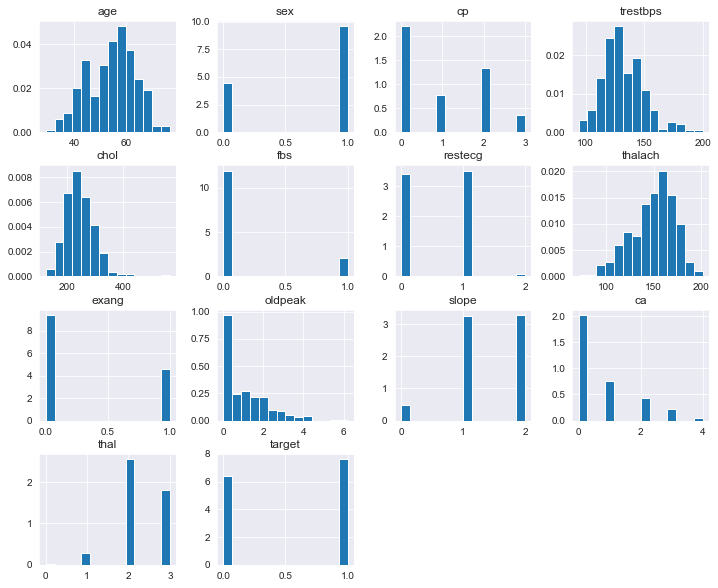

In [19]:
# A General overview of the dataset

data.hist(bins=14, figsize=(12,10),density=True)
plt.show()

### Check for Types and Missing Values

In [31]:
# Types and missing values
print("Missing values:",data.isna().sum().sum())
print()
data.info()

Missing values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Unique Values

In [34]:
# Distinct values dictionary to map column names to unique values

{column: len(data[column].unique())for column in data.columns}

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'target': 2}

# Feature selection

### Split dataset

In [3]:
 # Split df into X and y
y = data['target'].copy()
X = data.drop('target', axis=1).copy()

In [4]:
columns = X.columns
print('X shape',X.shape)

X shape (303, 13)


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Low Variance Filtering

Varience

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
dtype: float64



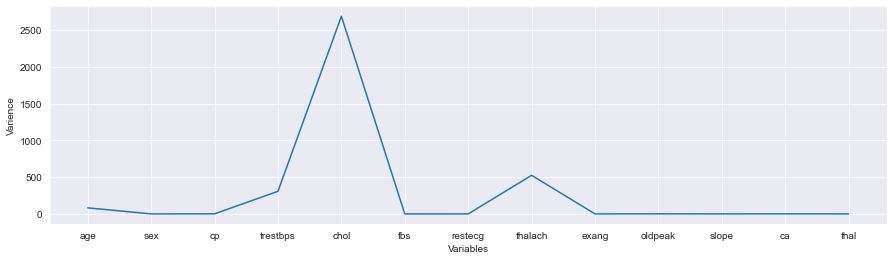

In [6]:
# Dataset variences

variance = X.var()

print('Varience')
print()
print(X.var())

print()

plt.figure(figsize= (15,4))
plt.xlabel('Variables')
plt.ylabel('Varience')
plt.plot(variance)      

###  Variables with variance more than the threshold value

In [7]:
# Saving the names of variables having variance more than a threshold value
# In this case all original variable are retained

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold
        variable.append(columns[i])
        
variable

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### New dataframe using the above variables

In [8]:
# creating a new dataframe using the above variables

new_data = X[variable]
print('new_data shape',new_data.shape)
new_data.head()

new_data shape (303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
dtype: float64



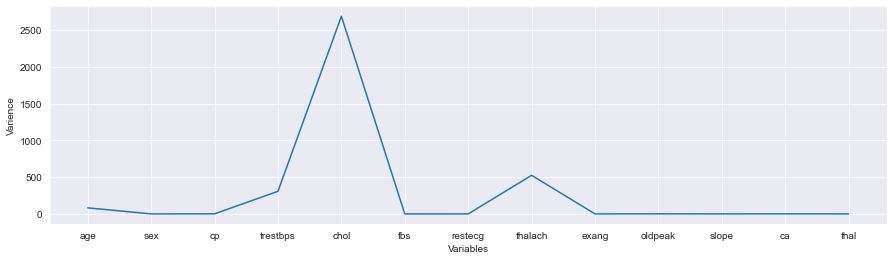

In [9]:
# Data variences

new_data_var = new_data.var()
print(new_data_var)

print()

plt.figure(figsize= (15,4))
plt.xlabel('Variables')
plt.ylabel('Varience')
plt.plot(new_data_var)

No change from the original dataset. All variables are within the threshold

## Variable encoding

In [10]:
# One Hot Encoding
# Use for smaller dataset

def onehot_encode(X, column_dict):
    X = new_data.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(X[column], prefix=prefix)
        X = pd.concat([X, dummies], axis=1)
        X = X.drop(column, axis=1)
        
    return X


# Encoding

def preprocess_inputs(X): #, scaler
    X = new_data.copy()
    
    # One-hot encode the nominal features
    
    nominal_features = ['cp', 'slope', 'thal','restecg']
    X = onehot_encode(X, dict(zip(nominal_features, ['CP', 'SL', 'TH','RECG'])))
    
       
    return X

In [11]:
# Check Encoded feature 

X = preprocess_inputs(new_data)
print(X.shape)
X

(303, 23)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,CP_0,...,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3,RECG_0,RECG_1,RECG_2
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,2,1,...,0,1,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,1,...,0,1,0,0,0,0,1,0,1,0


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Class distributions

In [13]:
#Class distributions

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=165 (54.455%)
Class=0, n=138 (45.545%)


### Synthetic Minority Oversampling Technique
Optional: classes are fairly well distributed

In [ ]:
#SMOTE

# label encode the target variable
#y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

## Model Definition and Training

In [14]:
# Class label mapping

class_label = {
    0: 'No Heart Disease',
    1: 'Heart Disease'
}

### Train Test Split

In [15]:
# Using 80% for training and 20% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [16]:
X_train.shape

(242, 23)

In [17]:
X_test.shape

(61, 23)

## Scaling

In [18]:
#StandardScaler, MinMaxScaler, RobustScaler
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = RobustScaler()


# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Dummy Classifier

In [52]:
# Dummy Classifier for baseline 
from sklearn.dummy import DummyClassifier

dummy= DummyClassifier(strategy='stratified',random_state=42)
dummy.fit(X_train,y_train)
 
pred_dum= dummy.predict(X_test)
pred2_dum= dummy.predict(X_train)

# Matthews correlation, f1 score and accuracy

dummy_mcc_train = matthews_corrcoef(y_train, pred2_dum)
print('MCC on train:',dummy_mcc_train.round(3))
dummy_mcc_test = matthews_corrcoef(y_test,pred_dum)
print('MCC on test:',dummy_mcc_test.round(3))

print()
dummy_f1_train = f1_score(y_train,pred2_dum,average='macro')
print('F1 on train',dummy_f1_train.round(3))
dummy_f1_test = f1_score(y_test, pred_dum, average='macro')
print('F1 on test',dummy_f1_test.round(3))

print()

dum_acc_train = accuracy_score(y_train, pred2_dum)
dum_acc_test = accuracy_score(y_test,pred_dum)

print('Accuracy on train:',dum_acc_train.round(3))
print('Accuracy on test:',dum_acc_test.round(3))


#print('Accuracy on train:',dummy.score(X_train,y_train).round(3))
#print('Accuracy on test:',dummy.score(X_test,y_test).round(3))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_dum).round(3)))
print()
dummy.get_params()

MCC on train: 0.079
MCC on test: 0.04

F1 on train 0.539
F1 on test 0.516

Accuracy on train: 0.545
Accuracy on test: 0.525

Confusion Matrix:
[[12 17]
 [12 20]]



{'constant': None, 'random_state': 42, 'strategy': 'stratified'}

In [53]:
# Cross Validation

scores=cross_val_score(dummy,X_train,y_train,cv=10,n_jobs=-1)
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

45.88% accuracy with a standard deviation of 11.25%


In [54]:
print("dummy:",classification_report(y_test, pred_dum))

dummy:               precision    recall  f1-score   support

           0       0.50      0.41      0.45        29
           1       0.54      0.62      0.58        32

    accuracy                           0.52        61
   macro avg       0.52      0.52      0.52        61
weighted avg       0.52      0.52      0.52        61



Text(0.5, 16.0, 'Predicted Class')

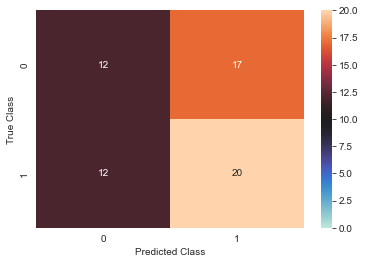

In [55]:
cm = confusion_matrix(y_test,pred_dum)

#plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='icefire')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [56]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.625     0.4137931]
Specificity Mean: 0.5193965517241379
Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.4137931 0.625    ]
Recall/Sensitivity Mean: 0.5193965517241379
Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.5        0.54054054]
Precision Mean: 0.5202702702702703
Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.375     0.5862069]
False Positive Rate Mean: 0.48060344827586204
Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.5862069 0.375    ]
False Negative Rate Mean: 0.48060344827586204
Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.5        0.45945946]
False Discovery Rate Mean: 0.4797297297297297


### ROC Plot

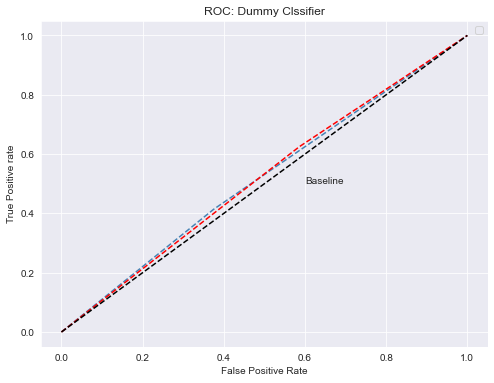

In [57]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = dummy.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue')#, label='No Heart Disease 0'
plt.plot(fpr[1], tpr[1], linestyle='--',color='red')#, label='Heart Disease 1'
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Dummy Clssifier')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Dummy ROC',dpi=300); 

### AUC Score

In [58]:
# AUC score

#from sklearn.metrics import roc_auc_score
dummy_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('Dummy AUC Score:',dummy_auc_score)

Dummy AUC Score: 0.5194


## Logistic Regression

In [60]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

lr = LogisticRegression(n_jobs=-1, solver='lbfgs',random_state=42,multi_class='auto').fit(X_train,y_train)

pred_lr= lr.predict(X_test)
pred2_lr= lr.predict(X_train)

# Matthews correlation, f1 score and accuracy

lr_mcc_train = matthews_corrcoef(y_train, pred2_lr)
print('MCC on train:',lr_mcc_train.round(3))
lr_mcc_test = matthews_corrcoef(y_test,pred_lr)
print('MCC on test:',lr_mcc_test.round(3))

print()
lr_f1_train = f1_score(y_train,pred2_lr,average='macro')
print('F1 on train:',lr_f1_train.round(3))
lr_f1_test = f1_score(y_test, pred_lr, average='macro')
print('F1 on test:',lr_f1_test.round(3))

print()

lr_acc_train = accuracy_score(y_train, pred2_lr)
lr_acc_test = accuracy_score(y_test,pred_lr)

print('Accuracy on train:',lr_acc_train.round(3))
print('Accuracy on test:',lr_acc_test.round(3))

#print("Accuracy on train: {:.3f}".format(accuracy_score(y_train,pred2_lr)))
#print("Accuracy on test: {:.3f}".format(accuracy_score(y_test,pred_lr)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_lr)))
print()
print('Logistic Regression Model Parameters')
lr.get_params()

MCC on train: 0.674
MCC on test: 0.745

F1 on train: 0.836
F1 on test: 0.869

Accuracy on train: 0.839
Accuracy on test: 0.869

Confusion Matrix:
[[27  2]
 [ 6 26]]

Logistic Regression Model Parameters


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Cross validation

In [61]:
# Cross Validation

scores=cross_val_score(lr,X_train,y_train,cv=10,n_jobs=-1)
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

82.25% accuracy with a standard deviation of 8.88%


### Classification report

In [64]:
print("lr:",classification_report(y_test, pred_lr))

lr:               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

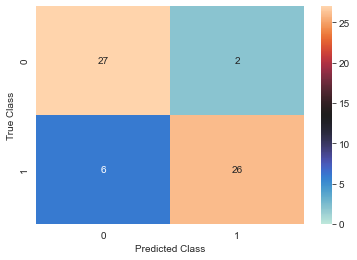

In [65]:
cm = confusion_matrix(y_test,pred_lr)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='icefire') #removed 'crest_r'
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [66]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.8125     0.93103448]
Specificity Mean: 0.8717672413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93103448 0.8125    ]
Recall/Sensitivity Mean: 0.8717672413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.81818182 0.92857143]
Precision Mean: 0.8733766233766234

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.1875     0.06896552]
False Positive Rate Mean: 0.12823275862068967

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06896552 0.1875    ]
False Negative Rate Mean: 0.12823275862068967

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.18181818 0.07142857]
False Discovery Rate Mean: 0.12662337662337664


### ROC Plot

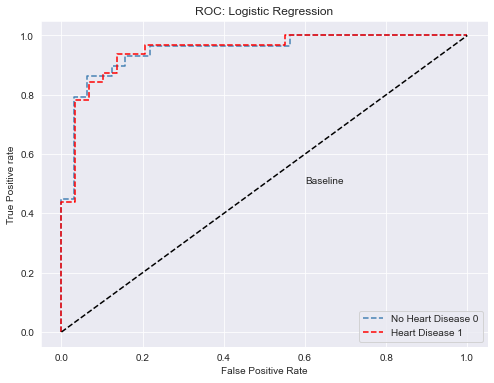

In [67]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = lr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Logistic Regression')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('LR ROC',dpi=300); 

### AUC Score

In [68]:
# AUC score

#from sklearn.metrics import roc_auc_score
lr_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('Logistic Regression AUC Score:',lr_auc_score)

Logistic Regression AUC Score: 0.9483


## Predictions and Confidence Interval 

### Index of  incorrect predictions

In [69]:
# Incorrect predictions

prediction_cplx = lr.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 6, 10, 11, 20, 25, 26, 30, 33], dtype=int64),)

### Classes and probabilities 

In [70]:
# Classes and Probabilities

prediction_probability = lr.predict_proba(X_test)
prediction_cplx = lr.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df

,No heart disease,Heart disease,Predicted class
0,0.938,0.062,0
1,0.599,0.401,0
2,0.234,0.766,1
3,0.952,0.048,0
4,0.048,0.952,1
...,...,...,...
56,0.905,0.095,0
57,0.050,0.950,1
58,0.950,0.050,0
59,0.988,0.012,0


### Jaccard similarity coefficient

In [71]:
# Jaccard similarity coefficient
# Predicted class compared with actual class


jaccard = jaccard_score(y_test, prediction_cplx, average = None)

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.771429
1,0.764706


### Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

#### Using model error

In [72]:
# 95% confidence interval (z = 1.96) See above

# calculated radius of the confidence interval (error)

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.13 * (1 - 0.13)) / 61)
print('Confidence interval radius:%.3f' % interval)

Confidence interval radius:0.084


* **The classification error of the model is 13%, +/- 8%**
* **The true classification error of the model is likely between 5% and 21%**.

* **The true model skill may lie outside of this range**.


### Upper and lower bounds of model classification accuracy

In [74]:
# Upper and lower bounds of model accuracy (95% confidence) using 53 correct predictions,
# out of a dataset of 61 instances and 95% conficence interval

# from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(55,63,0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.791 
Upper Bounds of Accuracy:0.955 


* **Using 95% confidence interval**
* **The true classification accuracy of the logistic regression model is likely between 80% and 96%** 


## Decision Tree

In [76]:
# Decision tree

dt = DecisionTreeClassifier(max_depth=6,random_state=42).fit(X_train,y_train)
pred_dt = dt.predict(X_test)
pred2_dt = dt.predict(X_train)

# Matthews correlation, f1 score and accuracy
dt_mcc_train = matthews_corrcoef(y_train, pred2_dt)
print('MCC on train',dt_mcc_train.round(3))
dt_mcc_test = matthews_corrcoef(y_test,pred_dt)
print('MCC on test',dt_mcc_test.round(3))

print()

dt_f1_train = f1_score(y_train,pred2_dt,average='macro')
print('F1 on train',dt_f1_train.round(3))
dt_f1_test = f1_score(y_test, pred_dt, average='macro')
print('F1 on test',dt_f1_test.round(3))
print()

dt_acc_train = accuracy_score(y_train, pred2_dt)
dt_acc_test = accuracy_score(y_test,pred_dt)

print('Accuracy on train:',dt_acc_train.round(3))
print('Accuracy on test:',dt_acc_test.round(3))


#print("Accuracy on train: {:.3f}".format(accuracy_score(y_train,pred2_dt)))
#print("Accuracy on test: {:.3f}".format(accuracy_score(y_test,pred_dt)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_dt)))
print()
print('Decision Tree Model Parameters')
dt.get_params()

MCC on train 0.918
MCC on test 0.548

F1 on train 0.958
F1 on test 0.77

Accuracy on train: 0.959
Accuracy on test: 0.77

Confusion Matrix:
[[24  5]
 [ 9 23]]

Decision Tree Model Parameters


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Cross validation

In [80]:
# Cross Validation

scores=cross_val_score(dt,X_train,y_train,cv=10,n_jobs=-1,scoring='f1')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

76.16% accuracy with a standard deviation of 5.30%


### Classification report

In [81]:
print("dt:",classification_report(y_test, pred_dt))

dt:               precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

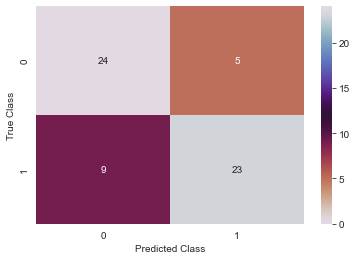

In [82]:
cm = confusion_matrix(y_test,pred_dt)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='twilight_r')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [83]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.71875    0.82758621]
Specificity Mean: 0.7731681034482758

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.82758621 0.71875   ]
Recall/Sensitivity Mean: 0.7731681034482758

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.72727273 0.82142857]
Precision Mean: 0.7743506493506493

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.28125    0.17241379]
False Positive Rate Mean: 0.22683189655172414

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.17241379 0.28125   ]
False Negative Rate Mean: 0.22683189655172414

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.27272727 0.17857143]
False Discovery Rate Mean: 0.22564935064935066


### ROC Plot

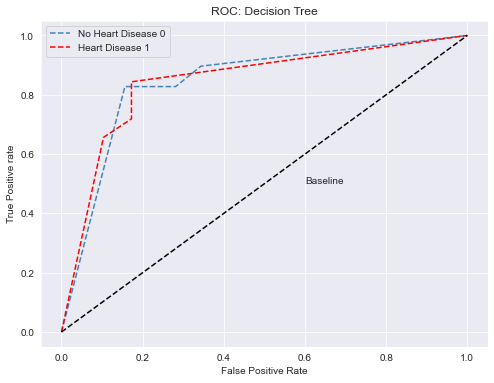

In [84]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = dt.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Decision Tree')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('DT ROC',dpi=300); 

###  AUC Score

In [85]:
# AUC score

#from sklearn.metrics import roc_auc_score
dt_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('Logistic Regression AUC Score:',dt_auc_score)

Logistic Regression AUC Score: 0.8443


## Predictions and Confidence Interval 

### Index of  incorrect predictions

In [86]:
# Incorrect predictions

prediction_cplx = dt.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 1, 11, 22, 23, 25, 26, 30, 34, 38, 41, 44, 52, 53, 56],
       dtype=int64),)

### Classes and probabilities 

In [87]:
# Classes and Probabilities

prediction_probability = dt.predict_proba(X_test)
prediction_cplx = dt.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df

,No heart disease,Heart disease,Predicted class
0,1.000,0.000,0
1,0.118,0.882,1
2,0.118,0.882,1
3,1.000,0.000,0
4,0.000,1.000,1
...,...,...,...
56,0.118,0.882,1
57,0.000,1.000,1
58,1.000,0.000,0
59,1.000,0.000,0


### Jaccard similarity coefficient

In [88]:
# Jaccard similarity coefficient
# Predicted class compared with actual class


jaccard = jaccard_score(y_test, prediction_cplx, average = None)

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.631579
1,0.621622


### Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

#### Using model error

In [89]:
X_test.shape

(61, 23)

In [100]:
# 95% confidence interval (z = 1.96) See above

# calculated radius of the confidence interval (error)

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.23 * (1 - 0.23)) / 61)
print('Confidence interval radius:%.3f' % interval)

Confidence interval radius:0.106


* **The classification error of the model is 23%, +/- 11%**
* **The true classification error of the model is likely between 12% and 34%**. 

* **True model skill may lie outside of this range**.

### Upper and lower bounds of model classification accuracy

In [91]:
# Upper and lower bounds of model accuracy (95% confidence) using 26 correct predictions,
# out of a dataset of 33 instances and 95% conficence interval

# from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(47, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.665 
Upper Bounds of Accuracy:0.876 


 
  
* **The true classification accuracy of the model is likely between 67% and 88%**.

* **True model skill may lie outside of this range**. 

## Feature Importances

In [92]:
ft_1=pd.DataFrame({'Features':X.columns,'Importances':dt.feature_importances_})
ft_1=ft_1.sort_values(by='Importances',ascending=False)
ft_1

,Features,Importances
18,TH_2,0.284557
9,CP_0,0.123664
7,oldpeak,0.110912
8,ca,0.104623
0,age,0.096547
3,chol,0.083658
5,thalach,0.063995
2,trestbps,0.059377
1,sex,0.037554
6,exang,0.015950


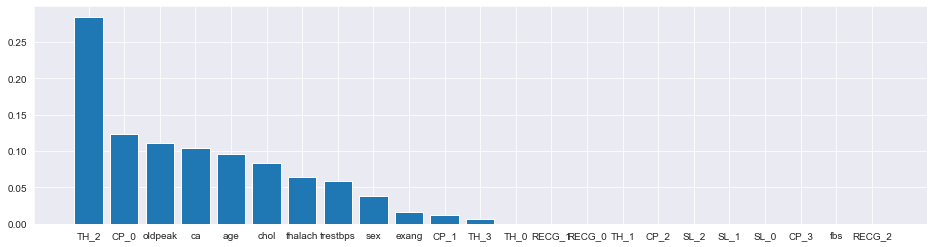

    Features  Importances
18      TH_2     0.284557
9       CP_0     0.123664
7    oldpeak     0.110912
8         ca     0.104623
0        age     0.096547
3       chol     0.083658
5    thalach     0.063995
2   trestbps     0.059377
1        sex     0.037554
6      exang     0.015950
10      CP_1     0.012371
19      TH_3     0.006792
16      TH_0     0.000000
21    RECG_1     0.000000
20    RECG_0     0.000000
17      TH_1     0.000000
11      CP_2     0.000000
15      SL_2     0.000000
14      SL_1     0.000000
13      SL_0     0.000000
12      CP_3     0.000000
4        fbs     0.000000
22    RECG_2     0.000000


In [93]:
# Features Plot and list
ft_1=pd.DataFrame({'Features':X.columns,'Importances':dt.feature_importances_})
ft_1=ft_1.sort_values(by='Importances',ascending=False)

# Features plot

plt.figure(figsize=(16,4))
plt.bar(ft_1['Features'],ft_1['Importances'])
plt.show()
print(ft_1)

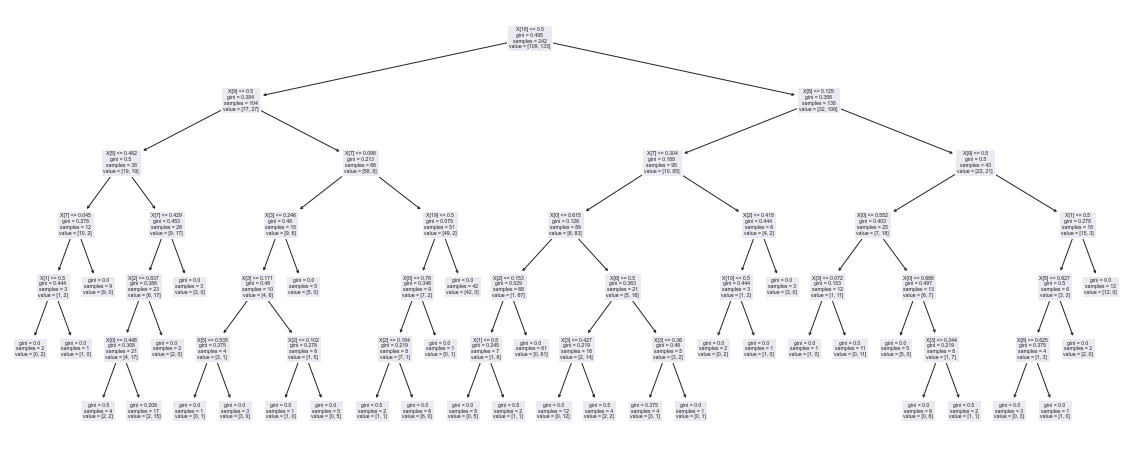

In [94]:
# Tree plot

from sklearn import tree
plt.figure(figsize=(20,8))
tree.plot_tree(dt)
#plt.savefig('dt.png')
plt.show()

## Random Forest Classifier

In [95]:
# Random forest

rf = RandomForestClassifier(n_estimators=10,n_jobs=-1,criterion='entropy',random_state=42)# removed , oob_score=True for too few estimators
rf.fit(X_train,y_train)
pred_rf= rf.predict(X_test)
pred2_rf= rf.predict(X_train)

# Matthews correlation, f1 score and accuracy

rf_mcc_train = matthews_corrcoef(y_train, pred2_rf)
print('MCC on train',rf_mcc_train.round(3))
rf_mcc_test = matthews_corrcoef(y_test,pred_rf)
print('MCC on test',rf_mcc_test.round(3)) 

print()

rf_f1_train = f1_score(y_train,pred2_rf,average='macro')
print('F1 on train',rf_f1_train.round(3))
rf_f1_test = f1_score(y_test, pred_rf, average='macro')
print('F1 on test',rf_f1_test.round(3))

print()

rf_acc_train = accuracy_score(y_train, pred2_rf)
rf_acc_test = accuracy_score(y_test,pred_rf)

print('Accuracy on train:',rf_acc_train.round(3))
print('Accuracy on test:',rf_acc_test.round(3))


#print("Accuracy on train: {:.3f}".format(accuracy_score(y_train,pred2_rf)))
#print("Accuracy on test: {:.3f}".format(accuracy_score(y_test,pred_rf)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_rf)))
print()
print('Random Forest Model Parameters')
rf.get_params()

MCC on train 0.967
MCC on test 0.745

F1 on train 0.983
F1 on test 0.869

Accuracy on train: 0.983
Accuracy on test: 0.869

Confusion Matrix:
[[27  2]
 [ 6 26]]

Random Forest Model Parameters


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Cross validation

In [96]:
# Cross Validation

scores=cross_val_score(rf,X_train,y_train,cv=10,n_jobs=-1,scoring='f1')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

82.09% accuracy with a standard deviation of 7.08%


### Classification report

In [98]:
print("rf:",classification_report(y_test, pred_rf))

rf:               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

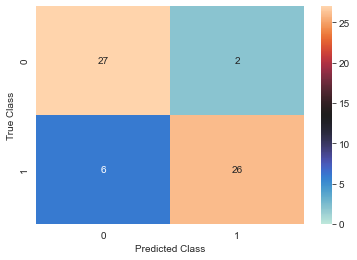

In [99]:
cm = confusion_matrix(y_test,pred_rf)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='icefire')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [101]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.8125     0.93103448]
Specificity Mean: 0.8717672413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93103448 0.8125    ]
Recall/Sensitivity Mean: 0.8717672413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.81818182 0.92857143]
Precision Mean: 0.8733766233766234

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.1875     0.06896552]
False Positive Rate Mean: 0.12823275862068967

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06896552 0.1875    ]
False Negative Rate Mean: 0.12823275862068967

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.18181818 0.07142857]
False Discovery Rate Mean: 0.12662337662337664


### ROC Plot

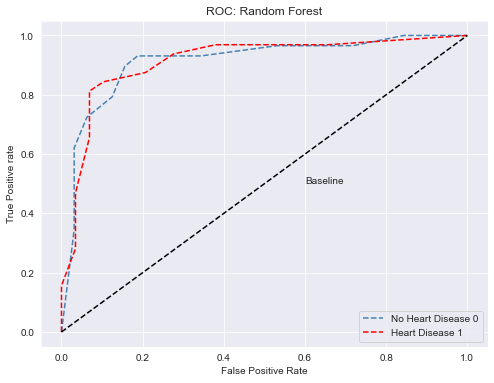

In [102]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = rf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Random Forest')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('RF ROC',dpi=300); 

### AUC Score

In [103]:
# AUC score

#from sklearn.metrics import roc_auc_score
rf_auc_score = roc_auc_score(y_test, prediction_cplx[:,i])

print('Random Forest AUC Score:',rf_auc_score)

Random Forest AUC Score: 0.9121767241379309


## Predictions and Confidences
 **Classes and Probabilities**

In [104]:
# Classes and Probabilities

prediction_probability = rf.predict_proba(X_test)
prediction_cplx = rf.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df

,No heart disease,Heart disease,Predicted class
0,1.0,0.0,0
1,0.6,0.4,0
2,0.4,0.6,1
3,0.8,0.2,0
4,0.1,0.9,1
...,...,...,...
56,0.6,0.4,0
57,0.2,0.8,1
58,0.8,0.2,0
59,1.0,0.0,0


In [105]:
# Incorrect predictions

prediction_cplx = rf.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 26, 29, 30, 33, 34, 38], dtype=int64),)

### Jaccard similarity coefficient

In [106]:
# Jaccard similarity coefficient
# Predicted class compared with actual class


jaccard = jaccard_score(y_test, prediction_cplx, average = None) #prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.771429
1,0.764706


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [107]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.13 * (1 - .13)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.084


* The classification error of the model is 13% +/- 8%
* The true classification error of the model on unseen data is likely between 5% and 21%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [108]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(53, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.784 
Upper Bounds of Accuracy:0.954 


 **The true classification accuracy of the model on unseen data is likely between 78% and 95%**.

 **True model skill may lie outside of this range.**

### Feature Importances

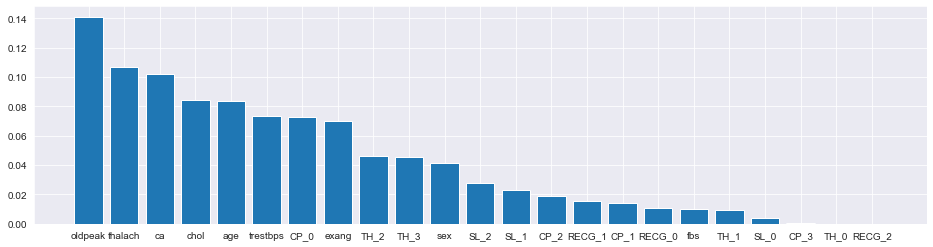

    Features  Importances
7    oldpeak     0.141051
5    thalach     0.106749
8         ca     0.101990
3       chol     0.084011
0        age     0.083392
2   trestbps     0.073600
9       CP_0     0.072681
6      exang     0.069955
18      TH_2     0.046381
19      TH_3     0.045379
1        sex     0.041186
15      SL_2     0.027972
14      SL_1     0.023154
11      CP_2     0.018608
21    RECG_1     0.015322
10      CP_1     0.014360
20    RECG_0     0.010653
4        fbs     0.010349
17      TH_1     0.009075
13      SL_0     0.003785
12      CP_3     0.000347
16      TH_0     0.000000
22    RECG_2     0.000000


In [109]:
# Features Plot and list
ft_1=pd.DataFrame({'Features':X.columns,'Importances':rf.feature_importances_})
ft_1=ft_1.sort_values(by='Importances',ascending=False)

# Features plot

plt.figure(figsize=(16,4))
plt.bar(ft_1['Features'],ft_1['Importances'])
plt.show()
print(ft_1)

## XGBoost

In [19]:
#XGBoost

evalset=[(X_train, y_train), (X_test,y_test)]

xgb = XGBClassifier(max_depth=10,n_jobs=-1,booster = "gbtree",
                    eval_metric =["logloss",'error'],objective ="binary:logistic")#remove-,num_class = 2 for 'binary:logistic'

xgb.fit(X_train, y_train,eval_set=evalset,verbose=False)
pred_xgb = xgb.predict(X_test)
pred2_xgb = xgb.predict(X_train)

# Matthews correlation, f1 score and accuracy

xgb_mcc_train = matthews_corrcoef(y_train, pred2_xgb)
print('MCC on train',xgb_mcc_train.round(3))
xgb_mcc_test = matthews_corrcoef(y_test,pred_xgb)
print('MCC on test',xgb_mcc_test.round(3)) 

print()

xgb_f1_train = f1_score(y_train,pred2_xgb,average='macro')
print('F1 on train',xgb_f1_train.round(3))
xgb_f1_test = f1_score(y_test, pred_xgb, average='macro')
print('F1 on test',xgb_f1_test.round(3))

print()

xgb_acc_train = accuracy_score(y_train, pred2_xgb)
xgb_acc_test = accuracy_score(y_test,pred_xgb)

print('Accuracy on train:',xgb_acc_train.round(3))
print('Accuracy on test:',xgb_acc_test.round(3))

#print("Accuracy on train: {:.3f}".format(accuracy_score(y_train,pred2_xgb)))
#print("Accuracy on test: {:.3f}".format(accuracy_score(y_test,pred_xgb)))
print('\n{}'.format(confusion_matrix(y_test,pred_xgb)))
print()
print('XGBoost model parameters')
xgb.get_params()

MCC on train 1.0
MCC on test 0.775

F1 on train 1.0
F1 on test 0.885

Accuracy on train: 1.0
Accuracy on test: 0.885

[[27  2]
 [ 5 27]]

XGBoost model parameters


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': ['logloss', 'error']}

### Learning curves

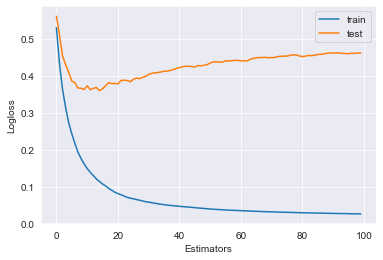

In [20]:
# retrieve performance metrics
results = xgb.evals_result()

# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.ylabel('Logloss')
plt.xlabel('Estimators')
plt.legend()
plt.show()

### Cross validation

In [111]:
# Cross Validation

scores=cross_val_score(xgb,X_train,y_train,cv=10,n_jobs=-1,scoring='f1')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

81.01% accuracy with a standard deviation of 7.04%


### Classification report

In [112]:
print("xgb:",classification_report(y_test, pred_xgb))

xgb:               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

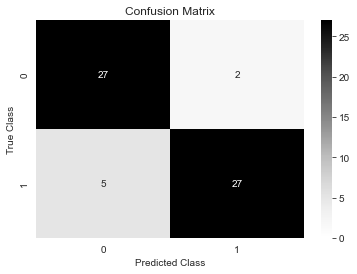

In [113]:
cm = confusion_matrix(y_test,pred_xgb)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [114]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.84375    0.93103448]
Specificity Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93103448 0.84375   ]
Recall/Sensitivity Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.84375    0.93103448]
Precision Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.15625    0.06896552]
False Positive Rate Mean: 0.11260775862068965

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06896552 0.15625   ]
False Negative Rate Mean: 0.11260775862068965

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.15625    0.06896552]
False Discovery Rate Mean: 0.11260775862068965


### ROC Plot

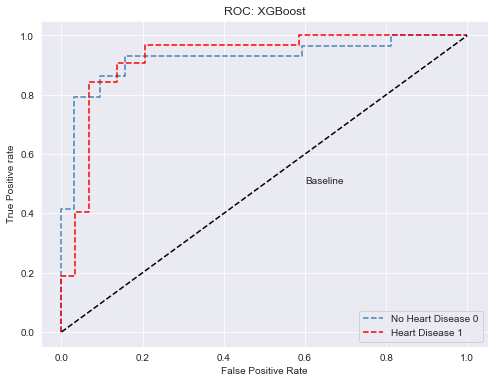

In [115]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = xgb.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: XGBoost')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('XGB ROC',dpi=300); 

### ROC AUC Score

In [116]:
# AUC score

#from sklearn.metrics import roc_auc_score
xgb_auc_score = roc_auc_score(y_test, prediction_cplx[:,i])

print('XGB AUC Score:',xgb_auc_score.round(3))

XGB AUC Score: 0.922


## Predictions and Confidences
 ### Classes and Probabilities

In [117]:
# Classes and Probabilities

prediction_probability = xgb.predict_proba(X_test)
prediction_cplx = xgb.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,1.000,0.000,0
1,0.937,0.063,0
2,0.726,0.274,0
3,0.995,0.005,0
4,0.029,0.971,1


### Index of  incorrect predictions

In [118]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 2, 11, 22, 25, 30, 33, 53], dtype=int64),)

### Jaccard similarity coefficient

In [119]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.794118
1,0.794118


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [120]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.11 * (1 - .11)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.079


* The classification error of the model is 11% +/- 8%
* The true classification error of the model on unseen data is likely between 3% and 19%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [121]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(54, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.805 
Upper Bounds of Accuracy:0.965 


 **The true classification accuracy of the model on unseen data is likely between 81% and 97%**.

 **True model skill may lie outside of this range.**

### Feature Importances

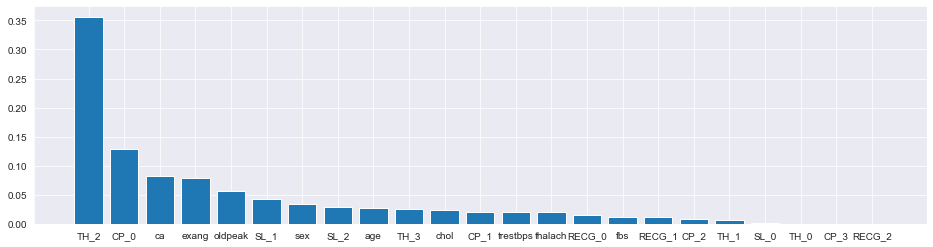

    Features  Importances
18      TH_2     0.356404
9       CP_0     0.128567
8         ca     0.082592
6      exang     0.078384
7    oldpeak     0.056481
14      SL_1     0.042297
1        sex     0.034699
15      SL_2     0.028182
0        age     0.027856
19      TH_3     0.025138
3       chol     0.023335
10      CP_1     0.020962
2   trestbps     0.020370
5    thalach     0.020176
20    RECG_0     0.015066
4        fbs     0.012143
21    RECG_1     0.012126
11      CP_2     0.007613
17      TH_1     0.005795
13      SL_0     0.001814
16      TH_0     0.000000
12      CP_3     0.000000
22    RECG_2     0.000000


In [122]:
# Features Plot and list
ft_1=pd.DataFrame({'Features':X.columns,'Importances':xgb.feature_importances_})
ft_1=ft_1.sort_values(by='Importances',ascending=False)

# Features plot

plt.figure(figsize=(16,4))
plt.bar(ft_1['Features'],ft_1['Importances'])
plt.show()
print(ft_1)

## SVM

In [123]:
# SVM 

svm = SVC(C=1.0,kernel='poly',decision_function_shape='ovr',probability=True,degree=3,random_state=42)#kernel='linear','rbf','poly','sigmoid'
svm.fit(X_train,y_train)

pred_svm = svm.predict(X_test)
pred2_svm = svm.predict(X_train)

# Matthews correlation, f1 score and accuracy

svm_mcc_train = matthews_corrcoef(y_train, pred2_svm)
print('svm_mcc_train',svm_mcc_train.round(3))
svm_mcc_test = matthews_corrcoef(y_test,pred_svm)
print('svm_mcc_test',svm_mcc_test.round(3))

print()

svm_f1_train = f1_score(y_train,pred2_svm,average='macro')
print('svm_f1_train',svm_f1_train.round(3))
svm_f1_test = f1_score(y_test, pred_svm, average='macro')
print('svm_f1_test',svm_f1_test.round(3))

print()

svm_acc_train = accuracy_score(y_train, pred2_svm)#variable for downstream results list
svm_acc_test = accuracy_score(y_test,pred_svm)#variable for downstream results list


print("Accuracy on train: {:.3f}".format(accuracy_score(y_train,pred2_svm)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_test,pred_svm)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_svm)))
print()
print('SVM Model Parameters')
svm.get_params()

svm_mcc_train 0.833
svm_mcc_test 0.836

svm_f1_train 0.916
svm_f1_test 0.918

Accuracy on train: 0.917
Accuracy on test: 0.918

Confusion Matrix:
[[26  3]
 [ 2 30]]

SVM Model Parameters


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Cross validation

In [124]:
# Cross Validation

scores=cross_val_score(svm,X_train,y_train,cv=10,n_jobs=-1,scoring='f1')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

81.83% accuracy with a standard deviation of 8.09%


### Classification report

In [125]:
# Classification report
print("svm:",classification_report(y_test, pred_svm))

svm:               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

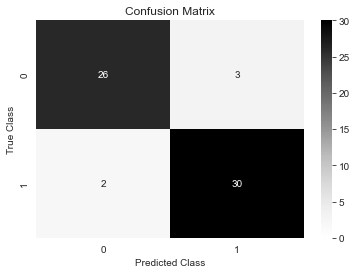

In [126]:
#Confusion matrix
cm = confusion_matrix(y_test,pred_svm)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [127]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.9375     0.89655172]
Specificity Mean: 0.9170258620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.89655172 0.9375    ]
Recall/Sensitivity Mean: 0.9170258620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.92857143 0.90909091]
Precision Mean: 0.9188311688311688

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.0625     0.10344828]
False Positive Rate Mean: 0.08297413793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.10344828 0.0625    ]
False Negative Rate Mean: 0.08297413793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.07142857 0.09090909]
False Discovery Rate Mean: 0.08116883116883117


### ROC Plot

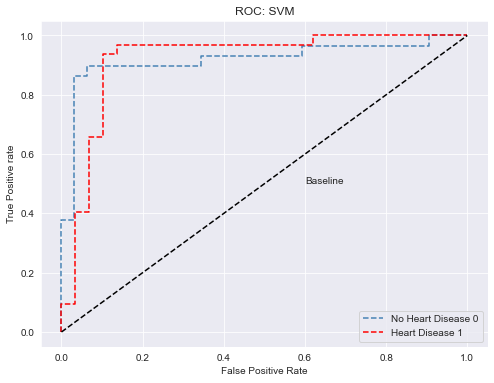

In [128]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = svm.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: SVM')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('SVM ROC',dpi=300); 

### ROC AUC Score

In [129]:
# AUC score

#from sklearn.metrics import roc_auc_score
svm_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('SVM AUC Score:',svm_auc_score)

SVM AUC Score: 0.9192


## Predictions and Confidences
 ### Classes and Probabilities

In [130]:
# Classes and Probabilities

prediction_probability = svm.predict_proba(X_test)
prediction_cplx = svm.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,0.807,0.193,0
1,0.168,0.832,1
2,0.051,0.949,1
3,0.914,0.086,0
4,0.106,0.894,1


### Index of  incorrect predictions

In [131]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 1, 22, 26, 30, 33], dtype=int64),)

### Jaccard similarity coefficient

In [132]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.838710
1,0.857143


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [133]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.08 * (1 - .08)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.068


* The classification error of the model is 8% +/- 7%
* The true classification error of the model on unseen data is likely between 1% and 15%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [134]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(56, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.849 
Upper Bounds of Accuracy:0.987 


 **The true classification accuracy of the model on unseen data is likely between 85% and 99%**.

 **True model skill may lie outside of this range.**

### KNN

In [142]:
#KNN


knn= KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(X_train,y_train)

pred_knn = knn.predict(X_test)
pred2_knn = knn.predict(X_train)

# Matthews correlation, f1 score and accuracy

knn_mcc_train = matthews_corrcoef(y_train, pred2_knn)
print('knn_mcc_train',knn_mcc_train.round(3))
knn_mcc_test = matthews_corrcoef(y_test,pred_knn)
print('knn_mcc_test',knn_mcc_test.round(3))

print()
knn_f1_train = f1_score(y_train,pred2_knn,average='macro')
print('knn_f1_train',knn_f1_train.round(3))
knn_f1_test = f1_score(y_test, pred_knn, average='macro')
print('knn_f1_test',knn_f1_test.round(3))

knn_acc_train = accuracy_score(y_train, pred2_knn) #variable for downstream results list
knn_acc_test = accuracy_score(y_test,pred_knn) #variable for downstream results list

print()

#print('knn acc on train',knn_acc_train.round(3)) 

print("knn_Acc on train: {:.3f}".format(accuracy_score(y_train, pred2_knn)))
print("knn_Acc on test: {:.3f}".format(accuracy_score(y_test, pred_knn)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,pred_knn))) 
print()
print('KNN Model Parameters')
knn.get_params()

knn_mcc_train 0.766
knn_mcc_test 0.775

knn_f1_train 0.883
knn_f1_test 0.885

knn_Acc on train: 0.884
knn_Acc on test: 0.885

Confusion Matrix:
[[27  2]
 [ 5 27]]

KNN Model Parameters


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### Cross validation

In [143]:
# Cross Validation

scores=cross_val_score(knn,X_train,y_train,cv=10,n_jobs=-1,scoring='f1')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (scores.mean()*100, scores.std()*100))

81.20% accuracy with a standard deviation of 8.67%


### Classification report

In [144]:
# Classification report
print('knn:',classification_report(y_test, pred_knn))

knn:               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

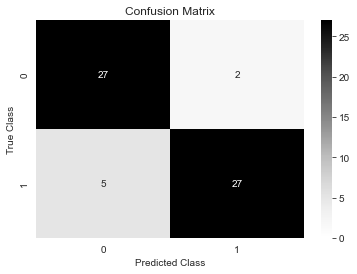

In [145]:
#Confusion matrix
cm = confusion_matrix(y_test,pred_knn)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [140]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.84375    0.93103448]
Specificity Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93103448 0.84375   ]
Recall/Sensitivity Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.84375    0.93103448]
Precision Mean: 0.8873922413793103

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.15625    0.06896552]
False Positive Rate Mean: 0.11260775862068965

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06896552 0.15625   ]
False Negative Rate Mean: 0.11260775862068965

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.15625    0.06896552]
False Discovery Rate Mean: 0.11260775862068965


### ROC Plot

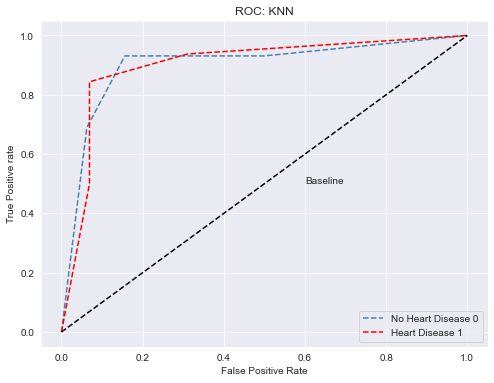

In [146]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = knn.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: KNN')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('KNN ROC',dpi=300); 

### AUC Score

In [147]:
# AUC score

#from sklearn.metrics import roc_auc_score
knn_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('KNN AUC Score:',knn_auc_score)

KNN AUC Score: 0.9003


## Predictions and Confidences
 ### Classes and Probabilities

In [148]:
# Classes and Probabilities

prediction_probability = knn.predict_proba(X_test)
prediction_cplx = knn.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,1.000,0.000,0
1,0.667,0.333,0
2,0.000,1.000,1
3,1.000,0.000,0
4,0.000,1.000,1


### Index of  incorrect predictions

In [149]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([20, 22, 26, 27, 30, 33, 38], dtype=int64),)

### Jaccard similarity coefficient

In [150]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.794118
1,0.794118


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [151]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.11 * (1 - .11)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.079


* The classification error of the model is 11% +/- 8%
* The true classification error of the model on unseen data is likely between 3% and 19%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [152]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(54, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.805 
Upper Bounds of Accuracy:0.965 


 **The true classification accuracy of the model on unseen data is likely between 81% and 97%**.

 **True model skill may lie outside of this range.**

# Stacking the Models

In [181]:
# Stacking classifier

base_models= [('lr',lr),
              ('dt',dt),
              ('rf',rf),
              ('xgb',xgb),
              ('svm',svm),
              ('knn',knn)]

# Initialize Stacking Classifier with the Meta Learner

stack = StackingClassifier(estimators=base_models,
                           final_estimator= MLPClassifier(random_state=1, max_iter=200),cv=10)


# Train stacked model

stack.fit(X_train, y_train)

# Make predictions
stack_train_pred = stack.predict(X_train)
stack_test_pred = stack.predict(X_test)

# Training set model performance
stack_train_accuracy = accuracy_score(y_train, stack_train_pred) # Calculate Accuracy
stack_train_mcc = matthews_corrcoef(y_train, stack_train_pred) # Calculate MCC
stack_train_f1 = f1_score(y_train, stack_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_test_accuracy = accuracy_score(y_test, stack_test_pred) # Calculate Accuracy
stack_test_mcc = matthews_corrcoef(y_test, stack_test_pred) # Calculate MCC
stack_test_f1 = f1_score(y_test, stack_test_pred, average='weighted') # Calculate F1-score


print()
print('Model performance for Training set')
print()
print('- Accuracy: %s' % stack_train_accuracy)
print('- MCC: %s' % stack_train_mcc)
print('- F1 score: %s' % stack_train_f1)
print()
print('----------------------------------')
print()
print('Model performance for Test set')
print()
print('- Accuracy: %s' % stack_test_accuracy)
print('- MCC: %s' % stack_test_mcc)
print('- F1 score: %s' % stack_test_f1)

print()
print('Stack Model Parameters')
stack.get_params()


Model performance for Training set

- Accuracy: 0.9462809917355371
- MCC: 0.8918272724036694
- F1 score: 0.9461460497505687

----------------------------------

Model performance for Test set

- Accuracy: 0.9016393442622951
- MCC: 0.802801724137931
- F1 score: 0.9016393442622951

Stack Model Parameters


{'cv': 10,
 'estimators': [('lr', LogisticRegression(n_jobs=-1, random_state=42)),
  ('dt', DecisionTreeClassifier(max_depth=6, random_state=42)),
  ('rf',
   RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                          random_state=42)),
  ('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric=['logloss', 'error'], gamma=0, gpu_id=-1,
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=10,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                 predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
                 scale_pos_weight=1, subsample=1, tree_method='exact',
                 validate_parameters=1, verbosity=No

### Classification report

In [182]:
# Classification report
print("stacked:",classification_report(y_test, stack_test_pred))

stacked:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

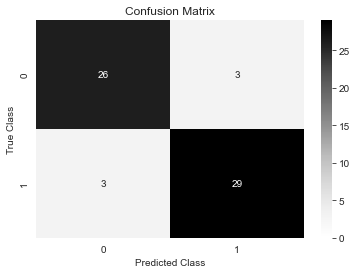

In [183]:
#Confusion matrix
cm = confusion_matrix(y_test,stack_test_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance Metrics

In [184]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.90625    0.89655172]
Specificity Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.89655172 0.90625   ]
Recall/Sensitivity Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.89655172 0.90625   ]
Precision Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.09375    0.10344828]
False Positive Rate Mean: 0.09859913793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.10344828 0.09375   ]
False Negative Rate Mean: 0.09859913793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.10344828 0.09375   ]
False Discovery Rate Mean: 0.09859913793103448


### ROC plot

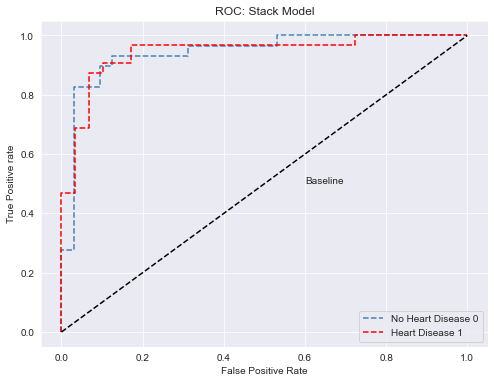

In [185]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = stack.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Stack Model')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300); 

### AUC SCORE

In [186]:
# AUC score

#from sklearn.metrics import roc_auc_score
stack_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('Stack AUC Score:',stack_auc_score)

Stack AUC Score: 0.9429


## Predictions and Confidences
 ### Classes and Probabilities

In [187]:
# Classes and Probabilities

prediction_probability = stack.predict_proba(X_test)
prediction_cplx = stack.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,0.926,0.074,0
1,0.601,0.399,0
2,0.208,0.792,1
3,0.926,0.074,0
4,0.067,0.933,1


### Index of  incorrect predictions

In [188]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 25, 26, 30, 33], dtype=int64),)

### Jaccard similarity coefficient

In [189]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.812500
1,0.828571


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [190]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.10 * (1 - .10)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.075


* The classification error of the model is 10% +/- 8%
* The true classification error of the model on unseen data is likely between 2% and 18%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [191]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(55, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.827 
Upper Bounds of Accuracy:0.976 


* The true classification accuracy of the model on unseen data is likely between 83% and 98%**.

 **True model skill may lie outside of this range.**

# All Models Train and Test Results

In [192]:
# Train set results lists

acc_train_list = {'knn':knn_acc_train,
'svm': svm_acc_train,
'dt': dt_acc_train,
'rf': rf_acc_train,
'lr': lr_acc_train,
'xgb': xgb_acc_train,
'stack': stack_train_accuracy}

mcc_train_list = {'knn':knn_mcc_train,
'svm': svm_mcc_train,
'dt': dt_mcc_train,
'rf': rf_mcc_train,
'lr': lr_mcc_train,
'xgb': xgb_mcc_train,
'stack': stack_train_mcc}

f1_train_list = {'knn':knn_f1_train,
'svm': svm_f1_train,
'dt': dt_f1_train,
'rf': rf_f1_train,
'lr': lr_f1_train,
'xgb': xgb_f1_train,
'stack': stack_train_f1}

# Test results lists

acc_test_list = {'knn':knn_acc_test,
'svm': svm_acc_test,
'dt': dt_acc_test,
'rf': rf_acc_test,
'lr': lr_acc_test,
'xgb': xgb_acc_test,
'stack': stack_test_accuracy}

mcc_test_list = {'knn':knn_mcc_test,
'svm': svm_mcc_test,
'dt': dt_mcc_test,
'rf': rf_mcc_test,
'lr': lr_mcc_test,
'xgb': xgb_mcc_test,
'stack': stack_test_mcc}

f1_test_list = {'knn':knn_f1_test,
'svm': svm_f1_test,
'dt': dt_f1_test,
'rf': rf_f1_test,
'lr': lr_f1_test,
'xgb': xgb_f1_test,
'stack': stack_test_f1}

auc_list = {'knn':knn_auc_score,
'svm':svm_auc_score,
'dt':dt_auc_score,
'rf':rf_auc_score,
'lr':lr_auc_score,
'xgb':xgb_auc_score,
'stack':stack_auc_score}


# All Models Training Results

In [193]:
# Training results dataframe

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])

print('All Models Training Results')

train_results_df = pd.concat([acc_df, mcc_df,f1_df], axis=1)
train_results_df



All Models Training Results


,Accuracy,MCC,F1
knn,0.884298,0.765950,0.882728
svm,0.917355,0.832909,0.916390
dt,0.958678,0.918088,0.958448
rf,0.983471,0.966803,0.983333
lr,0.838843,0.673752,0.836154
xgb,1.000000,1.000000,1.000000
stack,0.946281,0.891827,0.946146


# All Models Test Results 

In [194]:
# Test results dataframe

test_acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
test_mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
test_f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
auc_df = pd.DataFrame.from_dict(auc_list, orient='index',columns=['AUC'])

print('All Models Test Results')


test_results_df = pd.concat([test_acc_df, test_mcc_df, test_f1_df,auc_df], axis=1)
test_results_df

All Models Test Results


,Accuracy,MCC,F1,AUC
knn,0.885246,0.774784,0.885246,0.900300
svm,0.918033,0.835855,0.917679,0.919200
dt,0.770492,0.547517,0.770430,0.844300
rf,0.868852,0.745142,0.868817,0.912177
lr,0.868852,0.745142,0.868817,0.948300
xgb,0.885246,0.774784,0.885246,0.922414
stack,0.901639,0.802802,0.901639,0.942900


*_____*

## Stacking the Best Performers

In [195]:
# Stacking classifier of the best performing models: random forest and xgboost

base_models= [('svm',svm),
              ('xgb',xgb)]

# Initialize Stacking Classifier with the Meta Learner

stack2 = StackingClassifier(estimators=base_models,
                           final_estimator= MLPClassifier(random_state=1, max_iter=200),cv=10)


# Train stacked model

stack2.fit(X_train, y_train)

# Make predictions
stack_train_pred2 = stack2.predict(X_train)
stack_test_pred2 = stack2.predict(X_test)

# Training set model performance
stack2_train_accuracy = accuracy_score(y_train, stack_train_pred2) # Calculate Accuracy
stack2_train_mcc = matthews_corrcoef(y_train, stack_train_pred2) # Calculate MCC
stack2_train_f1 = f1_score(y_train, stack_train_pred2, average='weighted') # Calculate F1-score

# Test set model performance
stack2_test_accuracy = accuracy_score(y_test, stack_test_pred2) # Calculate Accuracy
stack2_test_mcc = matthews_corrcoef(y_test, stack_test_pred2) # Calculate MCC
stack2_test_f1 = f1_score(y_test, stack_test_pred2, average='weighted') # Calculate F1-score


print()
print('Model performance for Training set')
print()
print('- Accuracy: %s' % stack2_train_accuracy)
print('- MCC: %s' % stack2_train_mcc)
print('- F1 score: %s' % stack2_train_f1)
print()
print('----------------------------------')
print()
print('Model performance for Test set')
print()
print('- Accuracy: %s' % stack2_test_accuracy)
print('- MCC: %s' % stack2_test_mcc)
print('- F1 score: %s' % stack2_test_f1)

print()
print('Stack Model Parameters')
stack2.get_params()


Model performance for Training set

- Accuracy: 0.987603305785124
- MCC: 0.9752052933993693
- F1 score: 0.9875859437685007

----------------------------------

Model performance for Test set

- Accuracy: 0.9016393442622951
- MCC: 0.802801724137931
- F1 score: 0.9016393442622951

Stack Model Parameters


{'cv': 10,
 'estimators': [('svm', SVC(kernel='poly', probability=True, random_state=42)),
  ('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric=['logloss', 'error'], gamma=0, gpu_id=-1,
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=10,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=-1, num_parallel_tree=1,
                 predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
                 scale_pos_weight=1, subsample=1, tree_method='exact',
                 validate_parameters=1, verbosity=None))],
 'final_estimator__activation': 'relu',
 'final_estimator__alpha': 0.0001,
 'final_estimator__batch_size': 'auto',
 'final_estimator__beta_1': 0.9,
 'final_estimator__beta_2': 0.

### Classification report

In [196]:
# Classification report
print("stacked best performers:",classification_report(y_test, stack_test_pred2))

stacked best performers:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

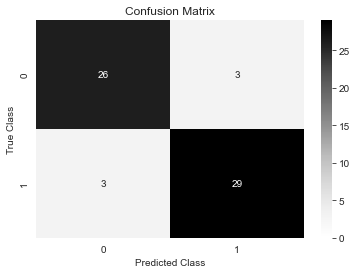

In [197]:
#Confusion matrix
cm = confusion_matrix(y_test,stack_test_pred2)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance metrics

In [198]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.90625    0.89655172]
Specificity Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.89655172 0.90625   ]
Recall/Sensitivity Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.89655172 0.90625   ]
Precision Mean: 0.9014008620689655

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.09375    0.10344828]
False Positive Rate Mean: 0.09859913793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.10344828 0.09375   ]
False Negative Rate Mean: 0.09859913793103448

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.10344828 0.09375   ]
False Discovery Rate Mean: 0.09859913793103448


### ROC plot

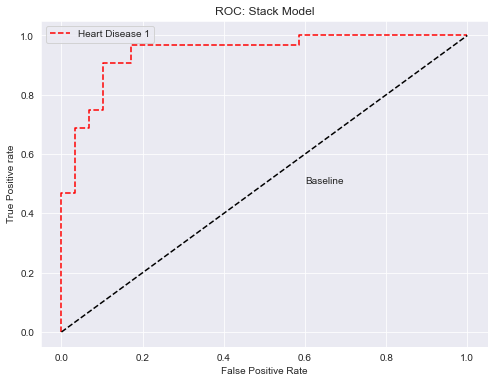

In [260]:
#ROC Plot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = stack2.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,i], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  



    
# plotting
plt.figure(figsize=(8, 6))
#plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='No Heart Disease 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Heart Disease 1')
plt.plot([0,1],[0,1],color="black",linestyle="--")
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Stack Model')
plt.text(0.6,0.5,"Baseline")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300); 

### AUC score

In [261]:
# AUC score

#from sklearn.metrics import roc_auc_score
stack_auc_score = roc_auc_score(y_test, prediction_cplx[:,i]).round(4)

print('Stack AUC Score:',stack_auc_score)

Stack AUC Score: 0.9429


## Predictions and Confidences
 ### Classes and Probabilities

In [262]:
# Classes and Probabilities

prediction_probability = stack2.predict_proba(X_test)
prediction_cplx = stack2.predict(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,0.882,0.118,0
1,0.530,0.470,0
2,0.325,0.675,1
3,0.907,0.093,0
4,0.089,0.911,1


### Index of incorrect predictions

In [263]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 25, 26, 30, 33], dtype=int64),)

### Jaccard similarity coefficient

In [264]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.812500
1,0.828571


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [204]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.10 * (1 - .10)) / 61)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.075


**The classification error of the model is 10% +/- 8%**

**The true classification error of the model on unseen data is likely between 2% and 18%.**
 
**The true model skill may lie outside of this range.**

### Upper and lower bounds of model accuracy

In [205]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(55, 61, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.827 
Upper Bounds of Accuracy:0.976 


* The true classification accuracy of the model on unseen data is likely between 83% and 98%**.

 **True model skill may lie outside of this range.**

**________________**

### Save the best model
#### Joblib

In [265]:
# Best performer, stacked random forest and xgboost models

joblib.dump(stack2,'./HrtDis_Small_Stacked.joblib')

['./HrtDis_Small_Stacked.joblib']

In [266]:
# Sanity Check
# Load the model
stack2=joblib.load('./HrtDis_Small_Stacked.joblib')

# Make a prediction
print('Class:',class_label)
print()
print('The class probabilites are:', stack2.predict_proba(X_test[0:1]))
print()
print('The sample prediction is class:',stack2.predict(X_test[0:1]))
print()
predictions_df.head()

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}

The class probabilites are: [[0.88227857 0.11772143]]

The sample prediction is class: [0]



,No heart disease,Heart disease,Predicted class
0,0.882,0.118,0
1,0.530,0.470,0
2,0.325,0.675,1
3,0.907,0.093,0
4,0.089,0.911,1


In [267]:
# Incorrect predictions

prediction_cplx = stack2.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 25, 26, 30, 33], dtype=int64),)

**________________________________________**

### Save the best model
#### Pickle

In [268]:
# Best performer, stacked random forest and xgboost models

filename = 'HrtDis_Small_Stacked.pkl'
pickle.dump(stack2, open(filename,'wb'))

### Test saved model

In [269]:
# Sanity Check
# Load model
Hrt_prd = pickle.load(open(filename,'rb'))

# Make a prediction
print('Class:',class_label)
print()
print('The class probabilites are:', Hrt_prd.predict_proba(X_test[2:3]))
print()
print('The sample prediction is class:', Hrt_prd.predict(X_test[2:3]))
predictions_df.head()

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}

The class probabilites are: [[0.32479586 0.67520414]]

The sample prediction is class: [1]


,No heart disease,Heart disease,Predicted class
0,0.882,0.118,0
1,0.530,0.470,0
2,0.325,0.675,1
3,0.907,0.093,0
4,0.089,0.911,1


In [270]:
# Incorrect predictions

prediction_cplx = stack2.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 25, 26, 30, 33], dtype=int64),)

**________________**

# Testing a saved model on unseen data

Use a saved model to predict on unseen data. The data is ceated using Faker, a Python package to generate fake data. 

Fake data can be created using pandas as well.

# Unseen data

### Data created using FAKER

In [215]:
# Can create a patient with test results in line with known target from dataset
# For creating fake data, ie a fake patient/patients for testing a model use faker or pandas

import faker
from faker import Faker
import csv

output = open('patient.csv','w')
fake=Faker()
header=['age','sex','chest_pain_type','rest_bp',
        'cholesterol','fbs', 'restecg','thalach',
        'exang','oldpeak','slope','ca','thal']

mywriter=csv.writer(output)
mywriter.writerow(header)
for r in range(10): 
    mywriter.writerow([fake.random_int(min=29,max=79),
                       fake.random_int(min=0,max=1,step=1),
                       fake.random_int(min=0,max=3),
                       fake.random_int(min=120,max=180,step=1),
                       fake.random_int(min=121,max=245),
                       fake.random_int(min=0,max=1,step=1),
                       fake.random_int(min=0,max=1,step=1),
                       fake.random_int(min=71,max=202,step=1),
                       fake.random_int(min=0,max=1),
                       fake.pydecimal(left_digits=1,right_digits=1,min_value=0,max_value=6),
                       fake.random_int(min=0,max=2,step=1),
                       fake.random_int(min=0,max=3,step=1),
                       fake.random_int(min=0,max=3,step=1)])
    #output.close()
    

ERROR! Session/line number was not unique in database. History logging moved to new session 3287


In [271]:
# Faker dataset

new_patients = pd.read_csv('patient.csv')
print('Fake dataset shape:',new_patients.shape)
new_patients 

Fake dataset shape: (10, 13)


,age,sex,chest_pain_type,rest_bp,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,38,0,3,171,162,0,0,160,1,3.4,1,2,2
1,68,0,1,127,177,1,0,132,0,5.7,1,3,2
2,36,1,3,180,130,1,1,142,0,0.5,2,3,1
3,58,0,1,160,180,0,1,98,1,1.7,1,2,0
4,55,0,1,150,137,1,0,185,1,0.1,1,1,0
5,34,1,1,171,148,0,0,96,1,3.1,2,2,0
6,40,0,2,126,197,1,1,105,1,4.3,2,0,2
7,43,1,1,155,215,1,0,199,0,1.4,0,1,0
8,31,0,2,120,162,0,1,170,1,1.9,1,1,1
9,32,0,2,131,171,1,0,144,1,1.0,2,3,1


### Encoding the Faker dataset

In [254]:
# Encoding for Faker dataset

def onehot_encode(df, column_dict):
    df = new_patients.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    return df


# Encoding the data
def preprocess_inputs(df): #, scaler
    df = new_patients.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['chest_pain_type', 'slope', 'thal','restecg','ca']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH','RECG','CA'])))
    
    return df

In [272]:
# Check Encoded features 
patient = preprocess_inputs(new_patients)
print(patient.shape)
patient

(10, 23)


,age,sex,rest_bp,cholesterol,fbs,thalach,exang,oldpeak,CP_1,CP_2,...,SL_2,TH_0,TH_1,TH_2,RECG_0,RECG_1,CA_0,CA_1,CA_2,CA_3
0,38,0,171,162,0,160,1,3.4,0,0,...,0,0,0,1,1,0,0,0,1,0
1,68,0,127,177,1,132,0,5.7,1,0,...,0,0,0,1,1,0,0,0,0,1
2,36,1,180,130,1,142,0,0.5,0,0,...,1,0,1,0,0,1,0,0,0,1
3,58,0,160,180,0,98,1,1.7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,55,0,150,137,1,185,1,0.1,1,0,...,0,1,0,0,1,0,0,1,0,0
5,34,1,171,148,0,96,1,3.1,1,0,...,1,1,0,0,1,0,0,0,1,0
6,40,0,126,197,1,105,1,4.3,0,1,...,1,0,0,1,0,1,1,0,0,0
7,43,1,155,215,1,199,0,1.4,1,0,...,0,1,0,0,1,0,0,1,0,0
8,31,0,120,162,0,170,1,1.9,0,1,...,0,0,1,0,0,1,0,1,0,0
9,32,0,131,171,1,144,1,1.0,0,1,...,1,0,1,0,1,0,0,0,0,1


### Classes and Probabilities

In [273]:
# Classes and Probabilities

prediction_probability = Hrt_prd.predict_proba(patient)
prediction_cplx = Hrt_prd.predict(patient)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


patient_df = pd.concat([proba_df,class_df ], axis=1)
patient_df.head()

,No heart disease,Heart disease,Predicted class
0,0.360,0.640,1
1,0.388,0.612,1
2,0.855,0.145,0
3,0.385,0.615,1
4,0.268,0.732,1


### Load model and test on fake data

In [274]:
# Make a prediction

Hrt_prd = pickle.load(open(filename,'rb'))

print('Class:',class_label)
print()
print('The class probabilites are:', Hrt_prd.predict_proba(patient[1:2]))
print()
print('The sample prediction is class:', Hrt_prd.predict(patient[1:2]))
patient_df.head()

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}

The class probabilites are: [[0.38825964 0.61174036]]

The sample prediction is class: [1]


,No heart disease,Heart disease,Predicted class
0,0.360,0.640,1
1,0.388,0.612,1
2,0.855,0.145,0
3,0.385,0.615,1
4,0.268,0.732,1


In [275]:
# Incorrect predictions

prediction_cplx = stack2.predict(X_test)

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([11, 22, 25, 26, 30, 33], dtype=int64),)